In [1]:
pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/80/6f/57d36f6507e432d7fc1956b2e9e8530c5c2d2bfcd8821bcbfae271cd6688/tensorflow-2.14.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.14.0-cp311-cp311-win_amd64.whl.metadata (3.3 kB)
  Obtaining dependency information for tensorflow-intel==2.14.0 from https://files.pythonhosted.org/packages/ad/6e/1bfe367855dd87467564f7bf9fa14f3b17889988e79598bc37bf18f5ffb6/tensorflow_intel-2.14.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.14.0-cp311-cp311-win_amd64.whl.metadata (4.8 kB)
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Using cached absl_py-2.0.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency information for flatbuffers>=23.5.26

## At what temperature does gas production stop and peak?

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv("biogasdf_ready.csv", parse_dates=['date'])
df['Month'] = df['date'].dt.month

In [4]:
bio1_phase0 = df[(df['bio_id'] == 1) & (df['phase_test'] == 0)]
bio1_phase1 = df[(df['bio_id'] == 1) & (df['phase_test'] == 1)]
bio1_phase2 = df[(df['bio_id'] == 1) & (df['phase_test'] == 2)]
bio1_phase3 = df[(df['bio_id'] == 1) & (df['phase_test'] == 3)]
bio2_phase0 = df[(df['bio_id'] == 2) & (df['phase_test'] == 0)]
bio2_phase1 = df[(df['bio_id'] == 2) & (df['phase_test'] == 1)]
bio2_phase2 = df[(df['bio_id'] == 2) & (df['phase_test'] == 2)]
bio2_phase3 = df[(df['bio_id'] == 2) & (df['phase_test'] == 3)]

In [5]:
bio1_phase1.sample(5)

,date,hour,fluid_temp,ground_temp,air_umidity,air_temp,gas_umidity,gas_temp,dm3_gas,bio_id,phase_test,Month
14268,2022-01-04,15:37:27,22.06,22.44,62.3,31.6,NaN,NaN,0.0,1,1,1
23405,2021-11-18,06:29:34,19.94,19.94,95.4,18.6,83.13,17.43,0.0,1,1,11
23025,2021-11-14,07:07:00,19.62,-127.00,89.6,14.6,83.71,14.80,0.0,1,1,11
10633,2021-12-25,00:32:54,22.25,22.81,92.6,14.9,NaN,NaN,0.0,1,1,12
9031,2021-12-08,04:27:37,21.44,22.19,95.9,13.4,NaN,NaN,0.0,1,1,12


In [6]:
bio1_phase1['Hour'] = pd.to_datetime(bio1_phase1['hour'], format='%H:%M:%S').dt.hour

C:\Users\bency\AppData\Local\Temp\ipykernel_9292\768263319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bio1_phase1['Hour'] = pd.to_datetime(bio1_phase1['hour'], format='%H:%M:%S').dt.hour


In [7]:
bio1_phase1_hour = bio1_phase1.groupby("Hour").mean().reset_index()

C:\Users\bency\AppData\Local\Temp\ipykernel_9292\2441499079.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bio1_phase1_hour = bio1_phase1.groupby("Hour").mean().reset_index()


NameError: name 'ax' is not defined

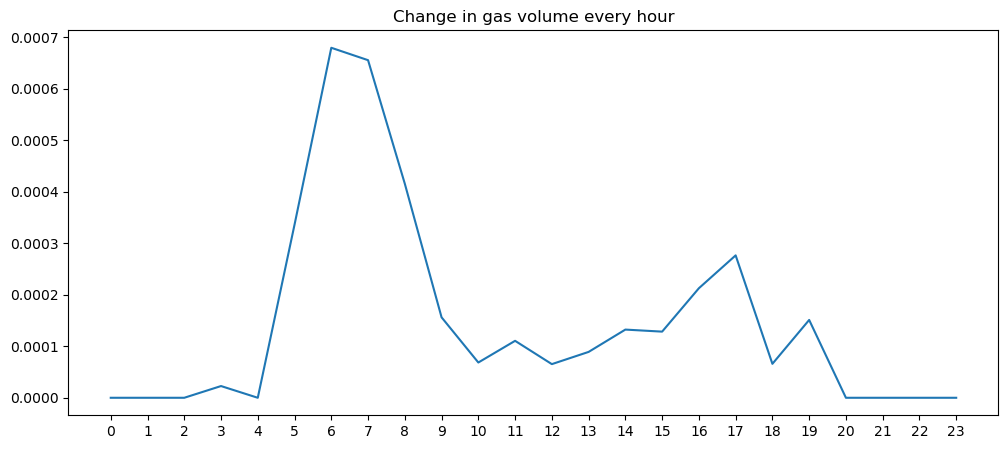

In [8]:
plt.figure(figsize=(12,5))
plt.plot(bio1_phase1_hour.Hour, bio1_phase1_hour.dm3_gas)
plt.xticks(np.arange(0, 24, step=1))
plt.title("Change in gas volume every hour")
ax.set_xlabel('Hours')
ax.set_ylabel('Volume')
plt.grid()
plt.show()

# Create a Figure and Axes
fig, ax = plt.subplots(figsize=(12,5))


#ax.plot(bio1_phase1_hour['Hour'], bio1_phase1_hour['fluid_temp'], label='Fluid Temperature')
ax.plot(bio1_phase1_hour['Hour'], bio1_phase1_hour['ground_temp'], label='Ground Temperature')
plt.yticks(np.arange(11.5, 15.5, step=0.2))

# Add title and labels
ax.set_title('Change in Ground Temperatures')
ax.set_xlabel('Hours')
ax.set_ylabel(' ')
ax.set_xticks(np.arange(0, 24, step=1))
plt.grid()
ax.legend()

# Display the plot
plt.show()

# Air Humidity
# Create a Figure and Axes
fig, ax = plt.subplots(figsize=(12,5))

#ax.plot(bio1_phase1_hour['Hour'], bio1_phase1_hour['air_umidity'], label='air_Humidity')
ax.plot(bio1_phase1_hour['Hour'], bio1_phase1_hour['air_temp'], label='Air Temperature')

# Add title and labels
ax.set_title('Change in Air-Temperature')
ax.set_xlabel('Hours')
ax.set_ylabel(' ')
ax.set_xticks(np.arange(0, 24, step=1))
plt.grid()

# Add a legend
ax.legend()

# Display the plot
plt.show()


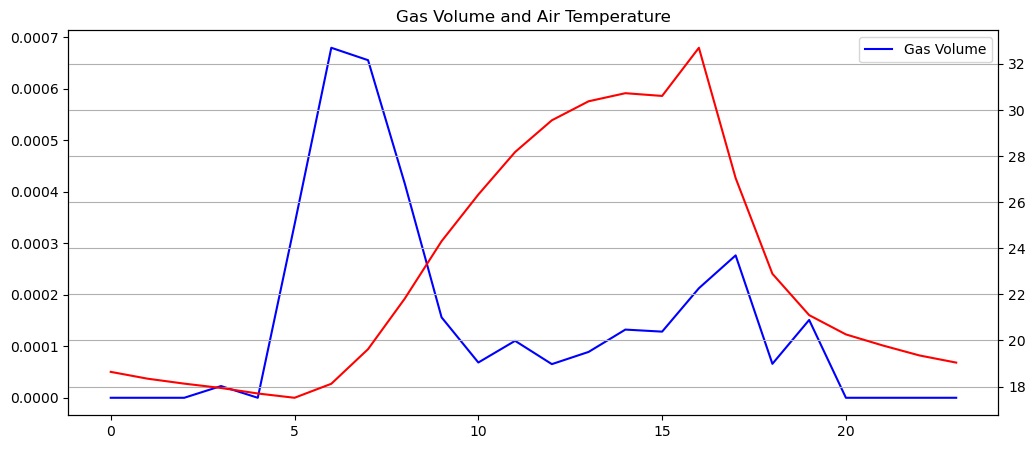

In [9]:
fig,ax = plt.subplots(figsize=(12,5))

ax.plot(bio1_phase1_hour.Hour, bio1_phase1_hour.dm3_gas, color="blue", label="Gas Volume")
plt.legend()
ax2 = ax.twinx()

ax2.plot(bio1_phase1_hour['Hour'], bio1_phase1_hour['air_temp'], color="red", label="Air temperature")

plt.title("Gas Volume and Air Temperature")
plt.grid()

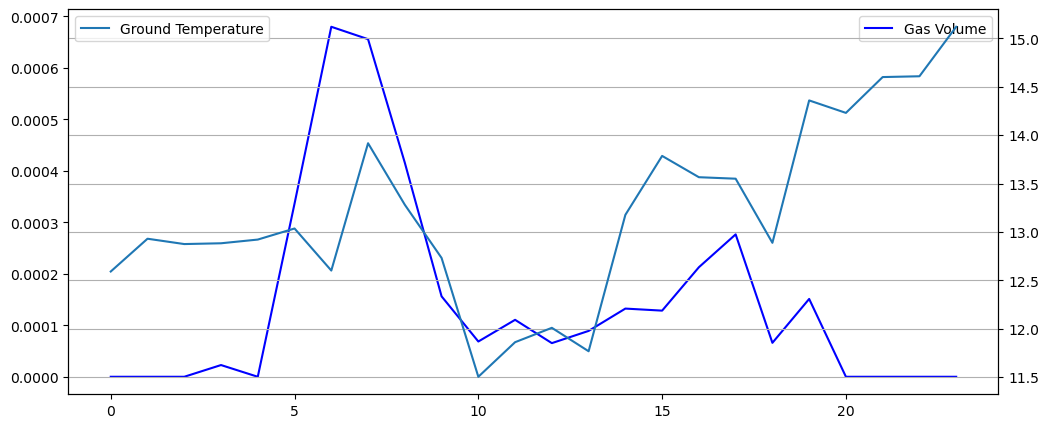

In [10]:
fig,ax = plt.subplots(figsize=(12,5))

ax.plot(bio1_phase1_hour.Hour, bio1_phase1_hour.dm3_gas, color="blue", label="Gas Volume")
plt.legend()
ax2 = ax.twinx()

ax2.plot(bio1_phase1_hour['Hour'], bio1_phase1_hour['ground_temp'], label='Ground Temperature')
plt.legend()
plt.grid()

In [11]:
# Lets get the range of the each features
columns = ["fluid_temp", "ground_temp", "air_umidity", "air_temp", "gas_umidity", "gas_temp"]
for col in columns:
    print(f" {col}  Minimum Value : {df[col].min()},  Maximum Value: {df[col].max()} change_value: {df[col].max()-df[col].min()}")

 fluid_temp  Minimum Value : -127.0,  Maximum Value: 24.38 change_value: 151.38
 ground_temp  Minimum Value : -127.0,  Maximum Value: 24.94 change_value: 151.94
 air_umidity  Minimum Value : 0.0,  Maximum Value: 99.9 change_value: 99.9
 air_temp  Minimum Value : 0.0,  Maximum Value: 52.6 change_value: 52.6
 gas_umidity  Minimum Value : 31.72,  Maximum Value: 113.06 change_value: 81.34
 gas_temp  Minimum Value : -12.62,  Maximum Value: 120.79 change_value: 133.41


In [12]:
bins = np.linspace(-0.85, 25, 25)
df['air_temp_bn'] = pd.cut(df['air_temp'], bins)
df['ground_temp_bn'] = pd.cut(df['ground_temp'], bins)
df['fluid_temp_bn'] = pd.cut(df['fluid_temp'], bins)
df['gas_temp_bn'] = pd.cut(df['gas_temp'], bins)

In [13]:
df_a_temp = df.groupby("air_temp_bn").mean().reset_index()
df_gr_temp = df.groupby("ground_temp_bn").mean().reset_index()
df_g_temp = df.groupby("gas_temp_bn").mean().reset_index()
df_f_temp = df.groupby("fluid_temp_bn").mean().reset_index()

C:\Users\bency\AppData\Local\Temp\ipykernel_9292\2877078309.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_a_temp = df.groupby("air_temp_bn").mean().reset_index()
C:\Users\bency\AppData\Local\Temp\ipykernel_9292\2877078309.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_gr_temp = df.groupby("ground_temp_bn").mean().reset_index()
C:\Users\bency\AppData\Local\Temp\ipykernel_9292\2877078309.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which

In [27]:
df_a_temp = df_a_temp.fillna(0)
df_a_temp["air_temp_start"] = df_a_temp["air_temp_bn"].apply(lambda x: x.left)
df_a_temp["air_temp_end"] = df_a_temp["air_temp_bn"].apply(lambda x: x.right)
df_a_temp.to_csv("df_a_temp.csv", index=False)

df_gr_temp = df_gr_temp.fillna(0)
df_gr_temp["ground_temp_start"] = df_gr_temp["ground_temp_bn"].apply(lambda x: x.left)
df_gr_temp["ground_temp_end"] = df_gr_temp["ground_temp_bn"].apply(lambda x: x.right)
df_gr_temp.to_csv("df_gr_temp.csv", index=False)

df_f_temp = df_f_temp.fillna(0)
df_f_temp["fluid_temp_start"] = df_f_temp["fluid_temp_bn"].apply(lambda x: x.left)
df_f_temp["fluid_temp_end"] = df_f_temp["fluid_temp_bn"].apply(lambda x: x.right)
df_f_temp.to_csv("df_f_temp.csv", index=False)

df_g_temp = df_g_temp.fillna(0)
df_g_temp["gas_temp_start"] = df_g_temp["gas_temp_bn"].apply(lambda x: x.left)
df_g_temp["gas_temp_end"] = df_g_temp["gas_temp_bn"].apply(lambda x: x.right)
df_g_temp.to_csv("df_g_temp.csv", index=False)

In [15]:
df_a_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   air_temp_bn  24 non-null     category
 1   fluid_temp   24 non-null     float64 
 2   ground_temp  24 non-null     float64 
 3   air_umidity  24 non-null     float64 
 4   air_temp     24 non-null     float64 
 5   gas_umidity  24 non-null     float64 
 6   gas_temp     24 non-null     float64 
 7   dm3_gas      24 non-null     float64 
 8   bio_id       24 non-null     float64 
 9   phase_test   24 non-null     float64 
 10  Month        24 non-null     float64 
dtypes: category(1), float64(10)
memory usage: 2.9 KB


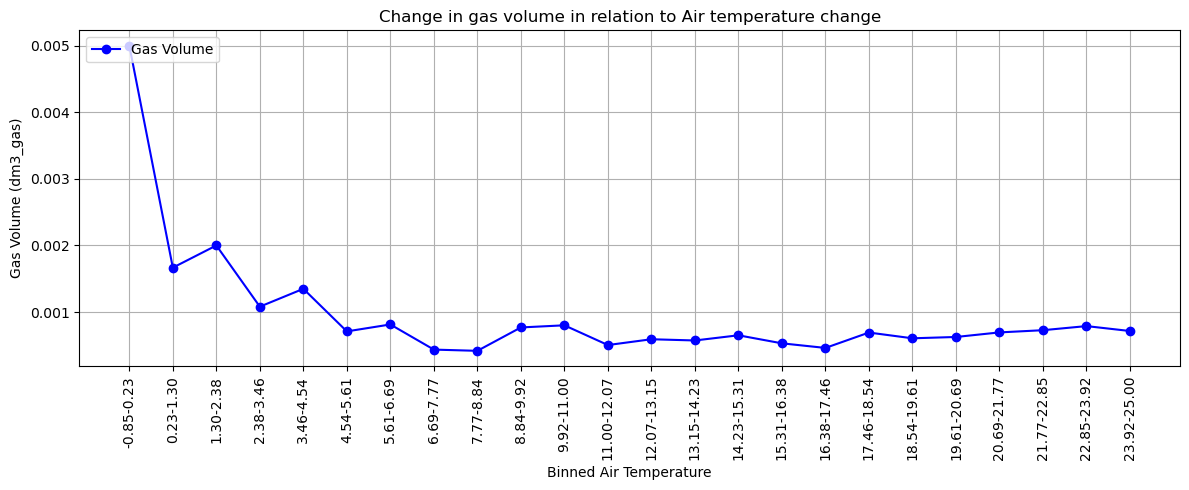

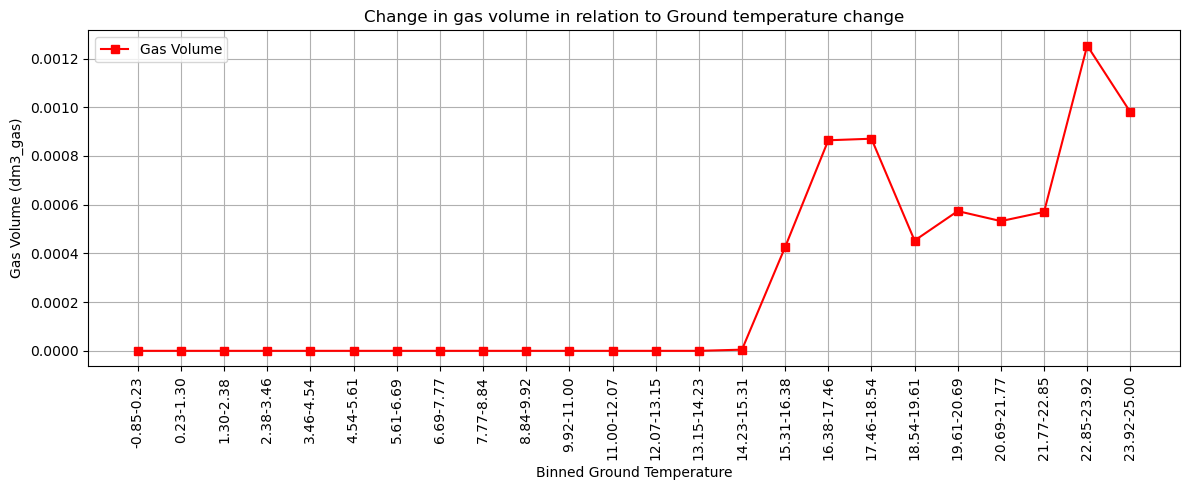

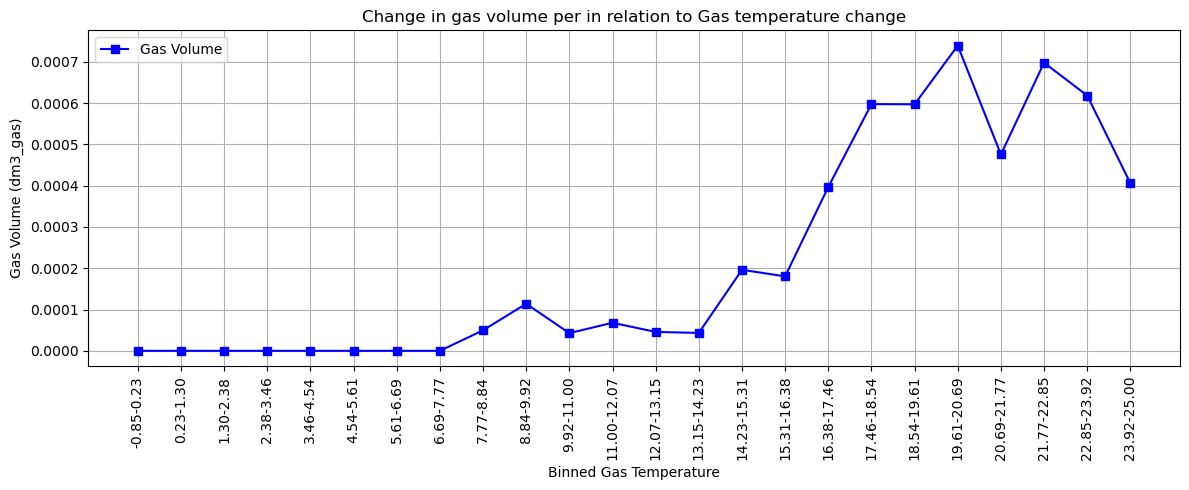

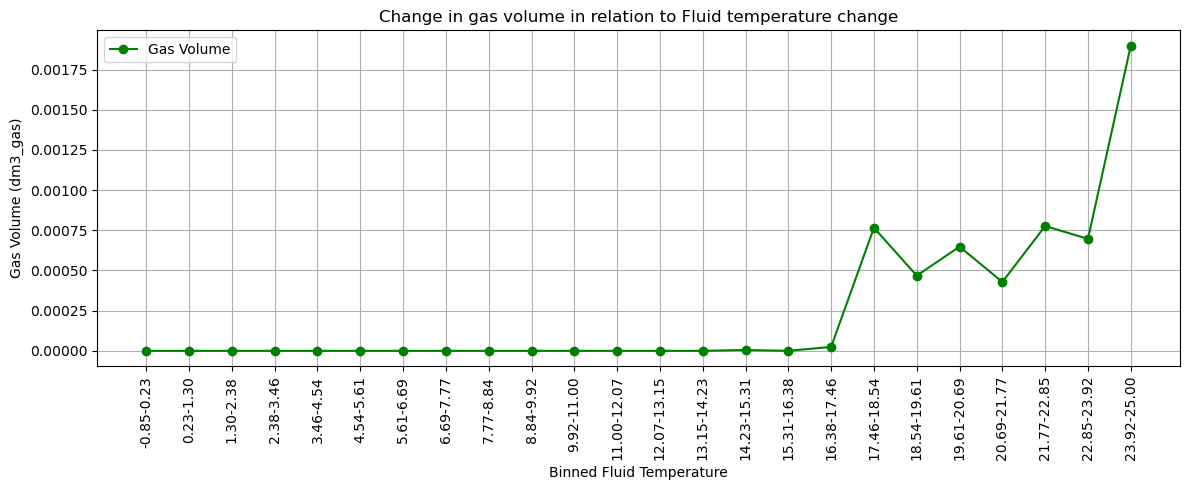

In [16]:
# Air Temperature
# Extracting numeric values from intervals
df_a_temp["air_temp_start"] = df_a_temp["air_temp_bn"].apply(lambda x: x.left)
df_a_temp["air_temp_end"] = df_a_temp["air_temp_bn"].apply(lambda x: x.right)

# Plot settings
plt.figure(figsize=(12, 5))
plt.xticks(np.arange(len(df_a_temp)), [f"{start:.2f}-{end:.2f}" for start, 
                                       end in zip(df_a_temp["air_temp_start"], df_a_temp["air_temp_end"])], rotation=90)
plt.title("Change in gas volume in relation to Air temperature change")
plt.grid()

# Plotting the data
plt.plot(df_a_temp.index, df_a_temp["dm3_gas"], marker='o', linestyle='-', color='b')

# Adding labels and legend
plt.xlabel("Binned Air Temperature")
plt.ylabel("Gas Volume (dm3_gas)")
plt.legend(["Gas Volume"], loc="upper left")

# Show the plot
plt.tight_layout()
plt.show()


# Ground Temperature
# Extracting numeric values from intervals
df_gr_temp["ground_temp_start"] = df_gr_temp["ground_temp_bn"].apply(lambda x: x.left)
df_gr_temp["ground_temp_end"] = df_gr_temp["ground_temp_bn"].apply(lambda x: x.right)

# Plot settings
plt.figure(figsize=(12, 5))
plt.xticks(np.arange(len(df_gr_temp)), [f"{start:.2f}-{end:.2f}" for start, 
                                       end in zip(df_gr_temp["ground_temp_start"], df_gr_temp["ground_temp_end"])], rotation=90)
plt.title("Change in gas volume in relation to Ground temperature change")
plt.grid()

# Plotting the data
plt.plot(df_gr_temp.index, df_gr_temp["dm3_gas"], marker='s', linestyle='-', color='r')

# Adding labels and legend
plt.xlabel("Binned Ground Temperature")
plt.ylabel("Gas Volume (dm3_gas)")
plt.legend(["Gas Volume"], loc="upper left")

# Show the plot
plt.tight_layout()
plt.show()

# Gas Temperature
# Extracting numeric values from intervals
df_g_temp["gas_temp_start"] = df_g_temp["gas_temp_bn"].apply(lambda x: x.left)
df_g_temp["gas_temp_end"] = df_g_temp["gas_temp_bn"].apply(lambda x: x.right)

# Plot settings
plt.figure(figsize=(12, 5))
plt.xticks(np.arange(len(df_g_temp)), [f"{start:.2f}-{end:.2f}" for start, 
                                       end in zip(df_g_temp["gas_temp_start"], df_g_temp["gas_temp_end"])], rotation=90)
plt.title("Change in gas volume per in relation to Gas temperature change")
plt.grid()

# Plotting the data
plt.plot(df_g_temp.index, df_g_temp["dm3_gas"], marker='s', linestyle='-', color='b')

# Adding labels and legend
plt.xlabel("Binned Gas Temperature")
plt.ylabel("Gas Volume (dm3_gas)")
plt.legend(["Gas Volume"], loc="upper left")

# Show the plot
plt.tight_layout()
plt.show()

# fluid Temperature
# Extracting numeric values from intervals
df_f_temp["fluid_temp_start"] = df_f_temp["fluid_temp_bn"].apply(lambda x: x.left)
df_f_temp["fluid_temp_end"] = df_f_temp["fluid_temp_bn"].apply(lambda x: x.right)

# Plot settings
plt.figure(figsize=(12, 5))
plt.xticks(np.arange(len(df_f_temp)), [f"{start:.2f}-{end:.2f}" for start, 
                                       end in zip(df_f_temp["fluid_temp_start"], df_f_temp["fluid_temp_end"])], rotation=90)
plt.title("Change in gas volume in relation to Fluid temperature change")
plt.grid()

# Plotting the data
plt.plot(df_f_temp.index, df_f_temp["dm3_gas"], marker='o', linestyle='-', color='g')

# Adding labels and legend
plt.xlabel("Binned Fluid Temperature")
plt.ylabel("Gas Volume (dm3_gas)")
plt.legend(["Gas Volume"], loc="upper left")

# Show the plot
plt.tight_layout()
plt.show()

- In reference from the visual: except for Air Temperature, the rest temperatures shows that there is no gas production in         temperatutes under 7.77, 
    
Explicitly:-

      - we can see that production is at peak when the Air Temperature is approximately between -o.85 to 0.23
      
      - Based on Ground Temperatures production stops at temp below 15 and is at peak when temp is 24
      
      - Based on Gas Temperatures production stops at temp below 7.77 and is at peak when temp is approximately 20.69
      
      - Based on Fluid Temperatures production stops at temp approximately below 17.46 and is at peak at approximately 25
 
                 
                 
    

## Can biogas 1 produce as much as biogas 2 in any month or phase?

In [17]:
bio1 = df[(df['bio_id'] == 1)]
bio2 = df[(df['bio_id'] == 2)]

In [18]:
bio1_month = bio1.groupby("Month").mean().reset_index()
bio2_month = bio2.groupby("Month").mean().reset_index()

C:\Users\bency\AppData\Local\Temp\ipykernel_9292\131804227.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bio1_month = bio1.groupby("Month").mean().reset_index()
C:\Users\bency\AppData\Local\Temp\ipykernel_9292\131804227.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bio2_month = bio2.groupby("Month").mean().reset_index()


In [19]:
bio1_month.head(2)

,Month,fluid_temp,ground_temp,air_umidity,air_temp,gas_umidity,gas_temp,dm3_gas,bio_id,phase_test
0,1,22.301797,22.854733,84.494808,23.306350,79.382956,27.561478,0.000217,1.0,1.0
1,2,23.126129,22.986422,80.238248,24.022617,85.512778,27.498115,0.000185,1.0,1.0


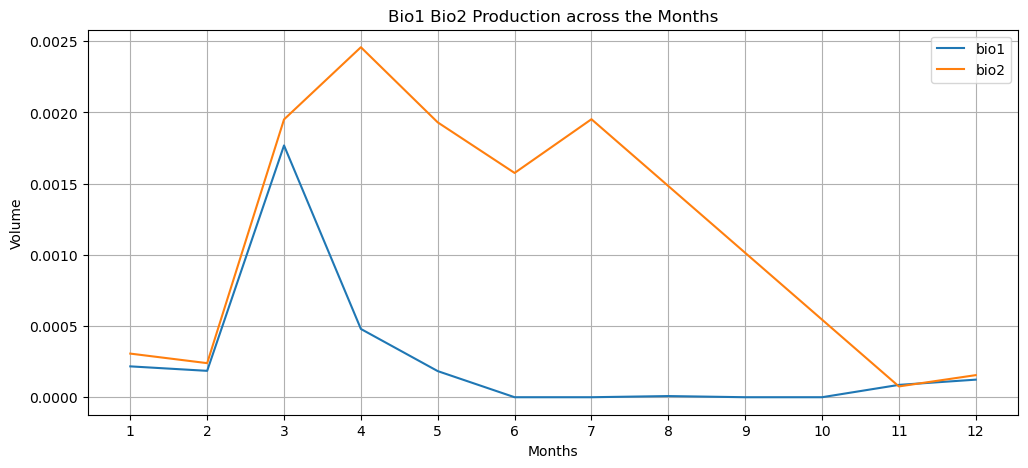

In [20]:
# Create a Figure and Axes
fig, ax = plt.subplots(figsize=(12,5))


ax.plot(bio1_month['Month'], bio1_month['dm3_gas'], label='bio1')
ax.plot(bio2_month['Month'], bio2_month['dm3_gas'], label='bio2')

# Add title and labels
ax.set_title('Bio1 Bio2 Production across the Months')
ax.set_xlabel('Months')
ax.set_ylabel('Volume')
ax.set_xticks(np.arange(1, 13, step=1))
plt.grid()
ax.legend()


Bio 1 canot produce as much as Bio2 across any month.

Noticably in the second month Bio1 production almost equals that of Bio2.

## Comparison of the 2 biogases in the 4 phases in relation to ground and air temperature. Does any phase maintain constant gas production despite changes in temperature?

In [21]:
df.head()

,date,hour,fluid_temp,ground_temp,air_umidity,air_temp,gas_umidity,gas_temp,dm3_gas,bio_id,phase_test,Month,air_temp_bn,ground_temp_bn,fluid_temp_bn,gas_temp_bn
0,2021-08-10,22:48:53,14.81,14.69,66.7,18.8,84.50,16.93,0.0,1,0,8,"(18.538, 19.615]","(14.229, 15.306]","(14.229, 15.306]","(16.383, 17.46]"
1,2021-08-10,23:33:53,14.88,14.69,78.3,18.0,84.45,15.83,0.0,1,0,8,"(17.46, 18.538]","(14.229, 15.306]","(14.229, 15.306]","(15.306, 16.383]"
2,2021-08-11,00:03:55,14.88,14.69,83.2,17.4,84.35,15.22,0.0,1,0,8,"(16.383, 17.46]","(14.229, 15.306]","(14.229, 15.306]","(14.229, 15.306]"
3,2021-08-11,00:33:55,14.88,14.69,84.8,16.7,84.15,14.58,0.0,1,0,8,"(16.383, 17.46]","(14.229, 15.306]","(14.229, 15.306]","(14.229, 15.306]"
4,2021-08-11,00:48:54,14.88,14.69,87.4,16.0,84.10,14.18,0.0,1,0,8,"(15.306, 16.383]","(14.229, 15.306]","(14.229, 15.306]","(13.152, 14.229]"


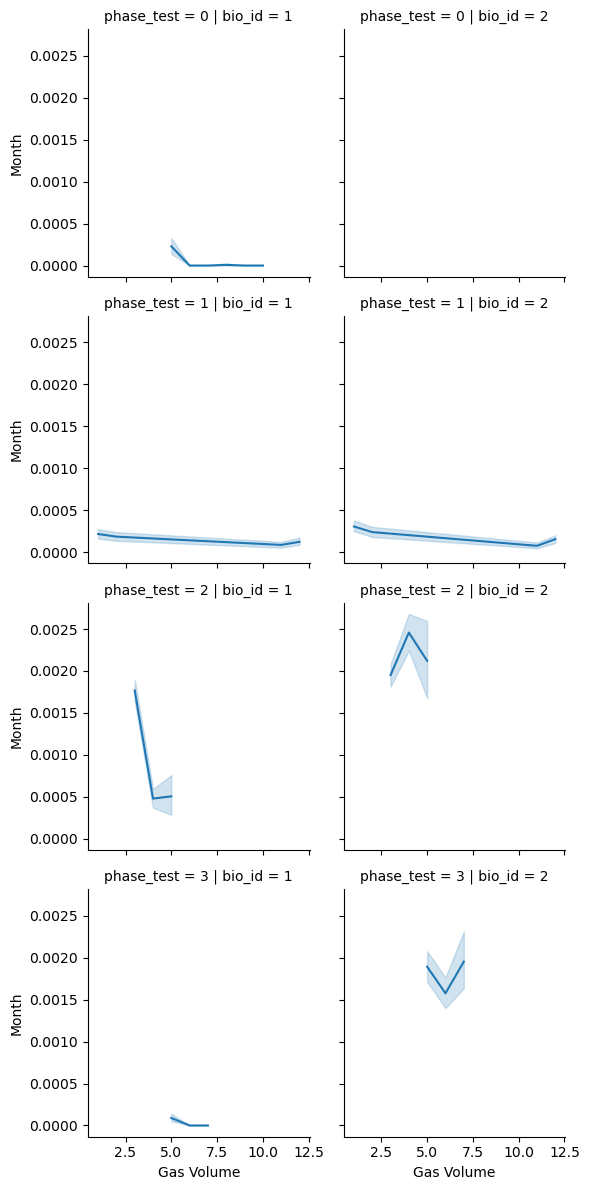

In [22]:
g = sns.FacetGrid(df, col="bio_id",  row="phase_test")
g.map_dataframe(sns.lineplot, x="Month", y="dm3_gas")
g.set_axis_labels("Gas Volume", "Month")

## Is it possible to know the months with high and low production?

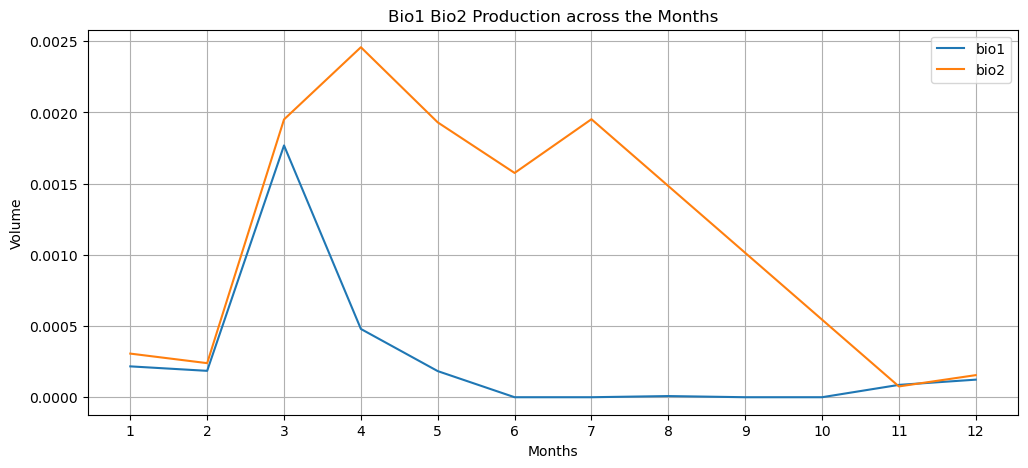

In [23]:
# Create a Figure and Axes
fig, ax = plt.subplots(figsize=(12,5))


ax.plot(bio1_month['Month'], bio1_month['dm3_gas'], label='bio1')
ax.plot(bio2_month['Month'], bio2_month['dm3_gas'], label='bio2')

# Add title and labels
ax.set_title('Bio1 Bio2 Production across the Months')
ax.set_xlabel('Months')
ax.set_ylabel('Volume')
ax.set_xticks(np.arange(1, 13, step=1))
plt.grid()
ax.legend()

In specific:-
    
    Bio 1; Months with highest production are 4th month(April), 3rd Month(March) followed by 7th month (July). On the other hand the last two months of the year has the lowest production.
    
    Bio 2; Its noted that only one month had high poduction which is the 3rd month(March) and several months with real low production which are 6th,7th,8th,9th and 10th months.

In [24]:
df_month = df.groupby("Month").mean().reset_index()

C:\Users\bency\AppData\Local\Temp\ipykernel_9292\1636925078.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_month = df.groupby("Month").mean().reset_index()


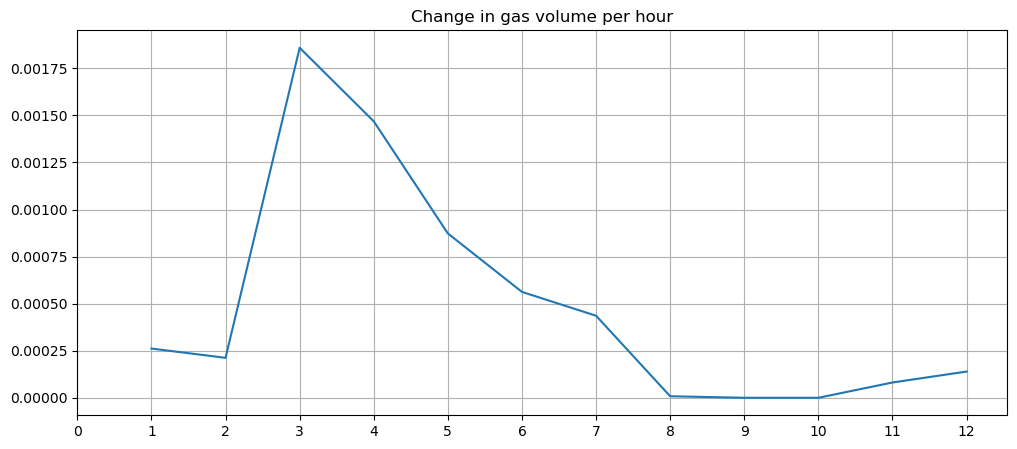

In [25]:
plt.figure(figsize=(12,5))
plt.plot(df_month.Month, df_month.dm3_gas)
plt.xticks(np.arange(0, 13, step=1))
plt.title("Change in gas volume per hour")
plt.grid()
plt.show()

The general production: 3rd month had the highest production

In [26]:
# Load your dataset
# Replace 'your_dataset.csv' with the actual file path
data = pd.read_csv('biogasdf_ready.csv')

# Select one bio digester and one phase
selected_bio_id = 1
selected_phase = 0
filtered_data = data[(data['bio_id'] == selected_bio_id) & (data['phase_test'] == selected_phase)]

# Define features (temperature, humidity, and gas volumes) and target (gas production)
feature_cols = ['fluid_temp', 'air_umidity', 'dm3_gas']
target_col = 'dm3_gas'  # You can replace this with 'gas_production' if needed

# Create lagged features for the last 24 hours
lags = 24
for feature in feature_cols:
    for lag in range(1, lags + 1):
        filtered_data[f'{feature}_lag_{lag}'] = filtered_data[feature].shift(lag)

# Drop rows with missing values due to the lag
filtered_data.dropna(inplace=True)

# Create feature matrix X and target vector y
X = filtered_data[[f'{feature}_lag_{lag}' for feature in feature_cols for lag in range(1, lags + 1)]]
y = filtered_data[target_col]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict gas production for the next hour
predicted_gas = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predicted_gas)
print(f"Mean Squared Error: {mse}")


C:\Users\bency\AppData\Local\Temp\ipykernel_9292\3447556329.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[f'{feature}_lag_{lag}'] = filtered_data[feature].shift(lag)
C:\Users\bency\AppData\Local\Temp\ipykernel_9292\3447556329.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[f'{feature}_lag_{lag}'] = filtered_data[feature].shift(lag)
C:\Users\bency\AppData\Local\Temp\ipykernel_9292\3447556329.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

NameError: name 'mean_squared_error' is not defined

In [ ]:
for set in [bio1_phase0, bio1_phase1, bio1_phase2, bio1_phase3,bio2_phase0,bio2_phase1,bio2_phase2,bio2_phase3]:
    print(f"Name : {set} shape : {set.shape}") 

In [ ]:
bio1_phase1.shape

In [ ]:
datadf = bio1_phase1[["gas_temp", "gas_umidity", "gas_temp", "dm3_gas"]]

In [ ]:
data.columns

In [ ]:
# Create lagged features for the last 24 hours
data_columns = ['gas_temp', 'gas_umidity', 'gas_temp']
lags = 24
for feature in data_columns:
    for lag in range(1, lags + 1):
        bio1_phase1[f'{feature}_lag_{lag}'] = bio1_phase1[feature].shift(lag)

In [ ]:
bio1_phase1.sample(5)

In [ ]:
bio1_phase1 = bio1_phase1.fillna(0)

In [ ]:
bio1_phase1.isna().sum()

In [ ]:
bio1_phase1.info()

In [ ]:
bio1_phase1.shape

In [ ]:
bio1_phase1.sample(5)

In [ ]:
# Create feature matrix X and target vector y
X = bio1_phase1[[f'{feature}_lag_{lag}' for feature in data_columns for lag in range(1, lags + 1)]]
y = bio1_phase1["dm3_gas"]

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize and train a Random Forest regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict gas production for the next hour
predicted_gas = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predicted_gas)
print(f"Mean Squared Error: {mse}")

In [ ]:
preds = model.predict(X)

In [ ]:
# calculating the derivative of gas production with respect to temperatures
temp = bio1_phase1['gas_temp'].to_numpy()
derivative = np.diff(preds)/np.diff(temp)

In [ ]:
# Finding where the derivative changes from positive to negativ
peak_index = np.argmax(derivative < 0)
plt.axvline(x=temp[peak_index], color='r', linestyle='--', label="Peak")
plt.legend()

plt.show()

## Sequential

In [ ]:
features = bio1_phase1[[f'{feature}_lag_{lag}' for feature in data_columns for lag in range(1, lags + 1)]]
features = features.drop(index=8476)
target = bio1_phase1["dm3_gas"]
target = target.drop(index=8476)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=False)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build LSTM model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

# Make predictions
predicted_gas = model.predict(X_test_scaled)



In [ ]:
preds_n = model.predict(scaler.fit_transform(features))

In [ ]:
preds_n.max()

In [ ]:
preds = pd.DataFrame(preds_n, columns=['dm3_gas_pred'])
gas_temp = bio1_phase1['gas_temp']

#pd.DataFrame({
#       'gas_temp': gas_temp,
#       'dm3_gas_pred': preds['dm3_gas_pred']})
